In [1]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, butter, filtfilt

In [3]:
def lowpass_filter(data, cutoff_freq, sample_rate, filter_order=5):
    nyquist_rate = 0.5 * sample_rate
    normalized_cutoff = cutoff_freq/ nyquist_rate
    b_coeficiente,a_coeficiente = butter(filter_order, normalized_cutoff, btype='low',analog=False)
    filtered_signal = filtfilt(b_coeficiente,a_coeficiente,data)
    return filtered_signal

def normalize_audio_int32(data):
    max_val = np.max(np.abs(data))
    normalized_data = data / max_val * 2147483647
    return normalized_data.astype(np.int32)

C:\Users\Windows\AppData\Local\Temp\ipykernel_3124\2535026469.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_signal = wavfile.read('teste.wav')


Sample Rate: 96000
Audio Signal Shape: (1681979, 2)
Max Value (Original Signal): 0.9989989995956421
Min Value (Original Signal): -0.9989989995956421


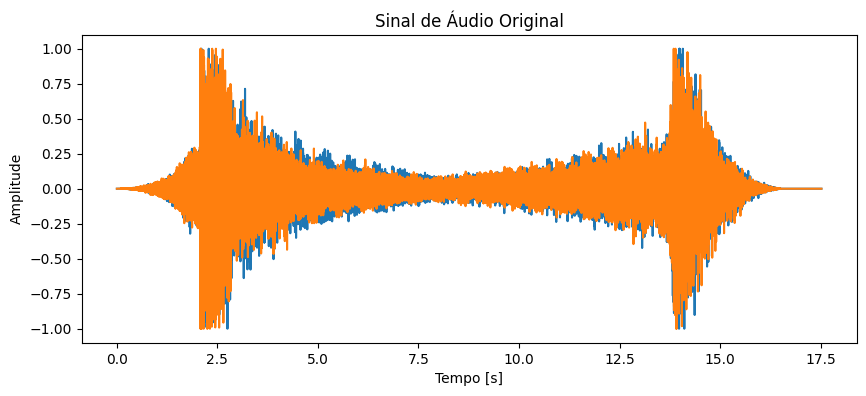

Filtered Signal Shape: (1681979,)
Max Value (Filtered Signal): 0.980433522830311
Min Value (Filtered Signal): -0.9365511109517329


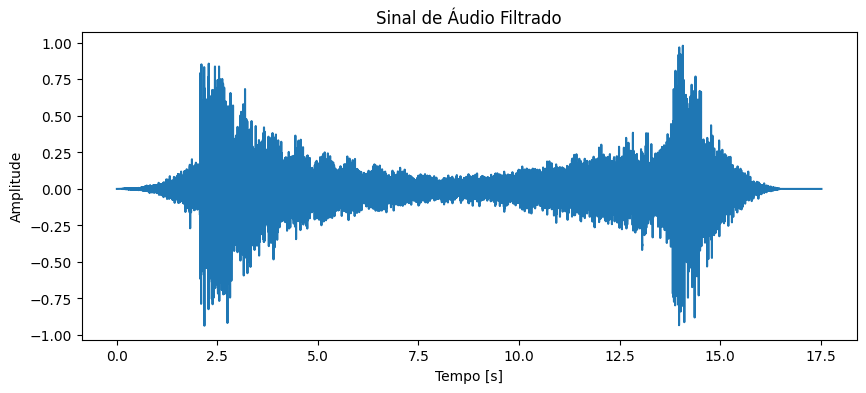

Max Value (Normalized Signal): 2147483647
Min Value (Normalized Signal): -1998225295


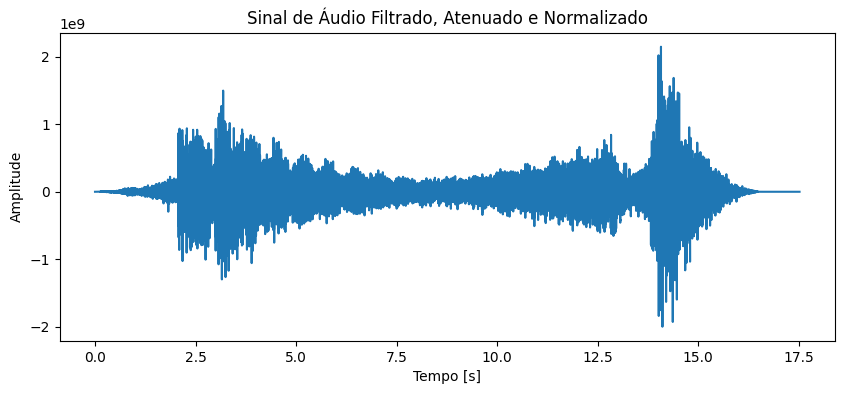

Sinal filtrado, atenuado e normalizado salvo como saida2.wav


In [4]:
sample_rate, audio_signal = wavfile.read('teste.wav')

print(f"Sample Rate: {sample_rate}")
print(f"Audio Signal Shape: {audio_signal.shape}")
print(f"Max Value (Original Signal): {np.max(audio_signal)}")
print(f"Min Value (Original Signal): {np.min(audio_signal)}")

plt.figure(figsize=(10, 4))
time_axis = np.linspace(0, len(audio_signal) / sample_rate, len(audio_signal))
plt.plot(time_axis, audio_signal)
plt.title('Sinal de Áudio Original')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.show()

if len(audio_signal.shape) > 1:
    audio_signal = audio_signal[:,0]

cutoff_frequency = 1000
filtered_signal = lowpass_filter(audio_signal,cutoff_frequency, sample_rate)

print(f"Filtered Signal Shape: {filtered_signal.shape}")
print(f"Max Value (Filtered Signal): {np.max(filtered_signal)}")
print(f"Min Value (Filtered Signal): {np.min(filtered_signal)}")

# Plotar o sinal filtrado
plt.figure(figsize=(10, 4))
plt.plot(time_axis, filtered_signal)
plt.title('Sinal de Áudio Filtrado')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.show()

segments_to_attenuate = [(1,3),(13,14)]
attenuation_factor = 0.5

attenuated_signal = filtered_signal.copy()
for start_time, end_time in segments_to_attenuate:
    start_sample = int(start_time * sample_rate)
    end_sample = int(end_time * sample_rate)
    attenuated_signal[start_sample:end_sample] *= attenuation_factor

normalized_filtered_signal = normalize_audio_int32(attenuated_signal)

print(f"Max Value (Normalized Signal): {np.max(normalized_filtered_signal)}")
print(f"Min Value (Normalized Signal): {np.min(normalized_filtered_signal)}")

plt.figure(figsize=(10, 4))
plt.plot(time_axis, normalized_filtered_signal)
plt.title('Sinal de Áudio Filtrado, Atenuado e Normalizado')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.show()

output_filename = 'saida2.wav'
wavfile.write(output_filename, sample_rate, normalized_filtered_signal)

print(f"Sinal filtrado, atenuado e normalizado salvo como {output_filename}")